       Category Gender  Quantity
0       college      F       373
1       college      M       388
2  competition       F       398
3  competition       M       456
4        school      F       894
5        school      M       971


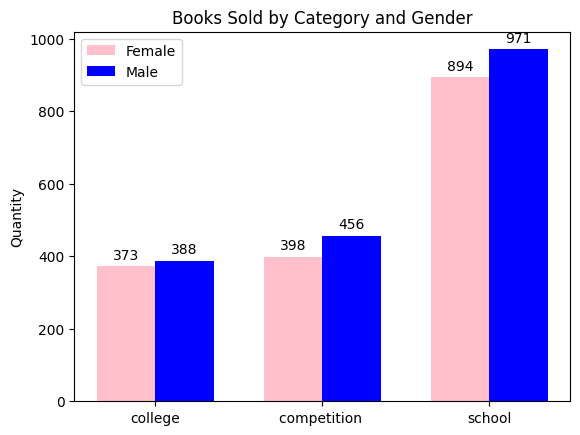

In [ ]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

books_sold = pd.read_csv('books_data.csv')
books_sold['Category'] = books_sold['Category'].str.lower()

# Group by both Category and Gender
summary = books_sold.dropna().groupby(['Category', 'Gender'])['Quantity'].count().reset_index()
print(summary)

# Create the bar plot with separate bars for each gender within each category
fig, ax = plt.subplots()
categories = summary['Category'].unique()
x = range(len(categories))

width = 0.35 # Width of the bars

rects1 = ax.bar([i - width/2 for i in x], summary[summary['Gender'] == 'F']['Quantity'], width, label='Female', color='pink')
rects2 = ax.bar([i + width/2 for i in x], summary[summary['Gender'] == 'M']['Quantity'], width, label='Male', color='blue')

# Add the values on the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


ax.set_ylabel('Quantity')
ax.set_title('Books Sold by Category and Gender')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

       Category  Quantity
0       college       761
1  competition        854
2        school      1865


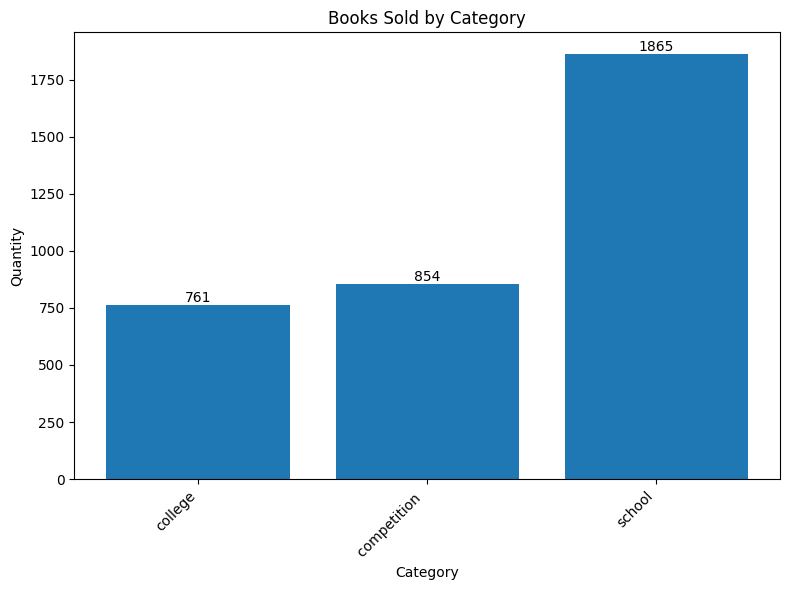

In [ ]:
summary = books_sold.dropna().copy()
summary['Category'] = summary['Category'].str.lower()
summary = summary.groupby('Category')['Quantity'].count().reset_index()
print(summary)

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(summary['Category'], summary['Quantity'])

# Add values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center') # va: vertical alignment, ha: horizontal alignment


plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Books Sold by Category')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

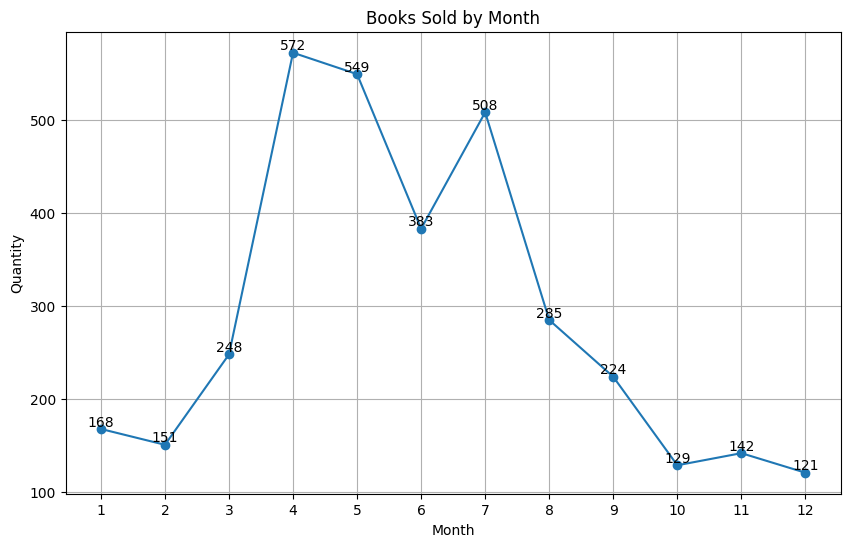

In [ ]:
# Convert 'Purchase_date' to datetime objects
books_sold['Purchase_date'] = pd.to_datetime(books_sold['Purchase_date'])

# Extract the month from the 'Purchase_date'
books_sold['Month'] = books_sold['Purchase_date'].dt.month

# Group by month and count the quantity
monthly_summary = books_sold.groupby('Month')['Quantity'].count().reset_index()

# Sort by month for proper plotting
monthly_summary = monthly_summary.sort_values('Month')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_summary['Month'], monthly_summary['Quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Books Sold by Month')
plt.xticks(monthly_summary['Month']) # Ensure all months are shown on the x-axis
plt.grid(True)

# Add values on the plot
for x, y in zip(monthly_summary['Month'], monthly_summary['Quantity']):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()